# RUN THIS CELL ONLY ONCE

In [2]:
import os
# Get the current path of the notebook

notebook_path = os.getcwd()
# Construct the path to the directory containing 'fit'
parent_path = os.path.join(notebook_path, '..')


./ckpts/t_ccnf.ckpt
{'N': 1, 'amp': False, 'batch_size': 1024, 'batchnorm': True, 'bins': [100, 100, 100, 100], 'cond_dim': 1, 'context_features': 1, 'coupling_hidden': 128, 'coupling_layers': 18, 'dataset': 'jet', 'decay': 0.999, 'dropout': 0, 'ema': True, 'ema_start': 50000, 'gan': 'lsgan', 'gp': False, 'hidden': 64, 'hidden_features': 128, 'hidden_gen': 128, 'l_dim': 16, 'l_dim_gen': 16, 'lambda_m': 0.1, 'lr': 0.0002, 'mass_loss': True, 'max': False, 'max_epochs': 2000, 'mean_field_loss': True, 'model': 'NF', 'n_dim': 3, 'n_part': 30, 'name': 'jet_nf', 'network_layers': 3, 'num_bins': 6, 'num_layers': 2, 'opt': 'AdamW', 'parton': 't', 'pretrain': False, 'sampler': False, 'spline': True, 'tail_bound': 7, 'weightdecay': 0.01, 'num_batches': 121, 'model_name': 'ccnf'}
<class 'fit.fit_nf.NF'>


/gpfs/dust/maxwell/user/kaechben/.conda/envs/mdma-cfm/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /gpfs/dust/maxwell/user/kaechben/.conda/envs/mdma-cf ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


1 <function w1m at 0x2b1d4608c0e0>
(0.002382261621593001, 0.0002453930162669905)
(0.0023556404764611396, 0.0002396687842522468)
(0.0024361383213824736, 4.845313846601881e-05)
(0.0024204837872708385, 0.00024898361504639477)
(0.0024286104040733758, 0.00022605458928243679)


/tmp/ipykernel_23047/3695229699.py:286: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


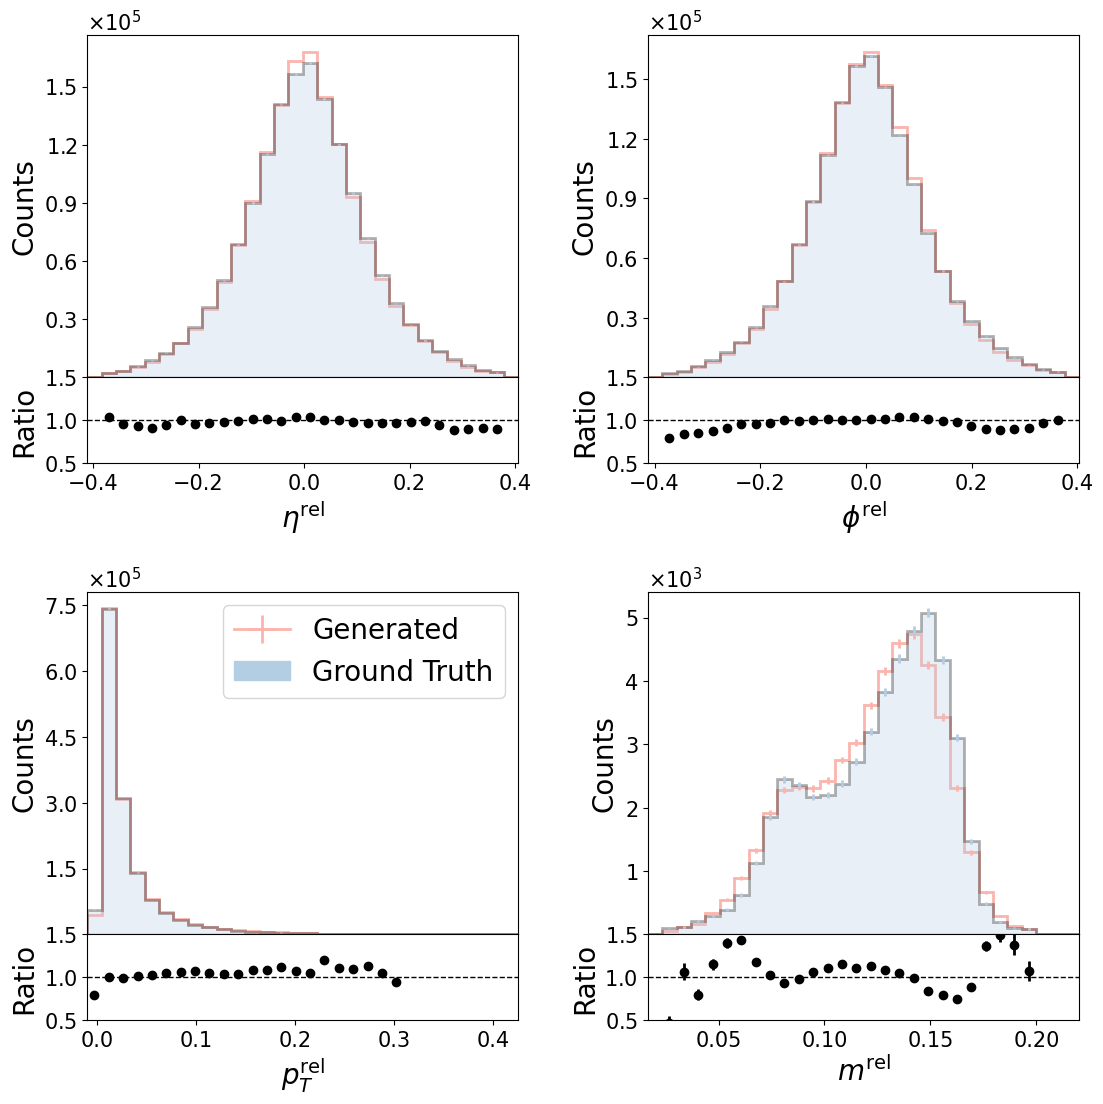

./ckpts/t_tf.ckpt
{'batch_size': 256, 'bins': [100, 100, 100, 100], 'ckpt': '', 'cond_dim': 0, 'dataset': 'jet', 'decay': 0.999, 'dropout': 0, 'ema': False, 'ema_start': 5000, 'fast': False, 'freq': 1, 'gan': 'lsgan', 'gp': False, 'hidden': 128, 'l_dim': 16, 'lr': 0.0001, 'max': True, 'max_epochs': 4000, 'mean_field_loss': False, 'model': 'TF', 'n_dim': 3, 'n_part': 30, 'name': 'jet_tf', 'noise': False, 'norm': False, 'num_heads': 16, 'num_layers': 4, 'opt': 'AdamW', 'parton': 't', 'pretrain': False, 'sampler': True, 'spectralnorm': False, 'stop_mean': True, 'weightdecay': 0.01, 'weightnorm': False, 'num_batches': 486, 'model_name': 'tf'}
<class 'fit.fit_tf.TF'>


/gpfs/dust/maxwell/user/kaechben/.conda/envs/mdma-cfm/lib/python3.11/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.activation_relu_or_gelu was not True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/gpfs/dust/maxwell/user/kaechben/.conda/envs/mdma-cfm/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /gpfs/dust/maxwell/user/kaechben/.conda/envs/mdma-cf ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


1 <function w1m at 0x2b1d4608c0e0>
(0.0005034937340281903, 0.00011473817337889644)
(0.000565028378330171, 9.074317830345086e-05)
(0.0004254495961442592, 5.8611549975886296e-05)
(0.0004153702401742343, 8.364729668116662e-05)
(0.0004142548680528996, 5.431727296348522e-05)


/tmp/ipykernel_23047/3695229699.py:286: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


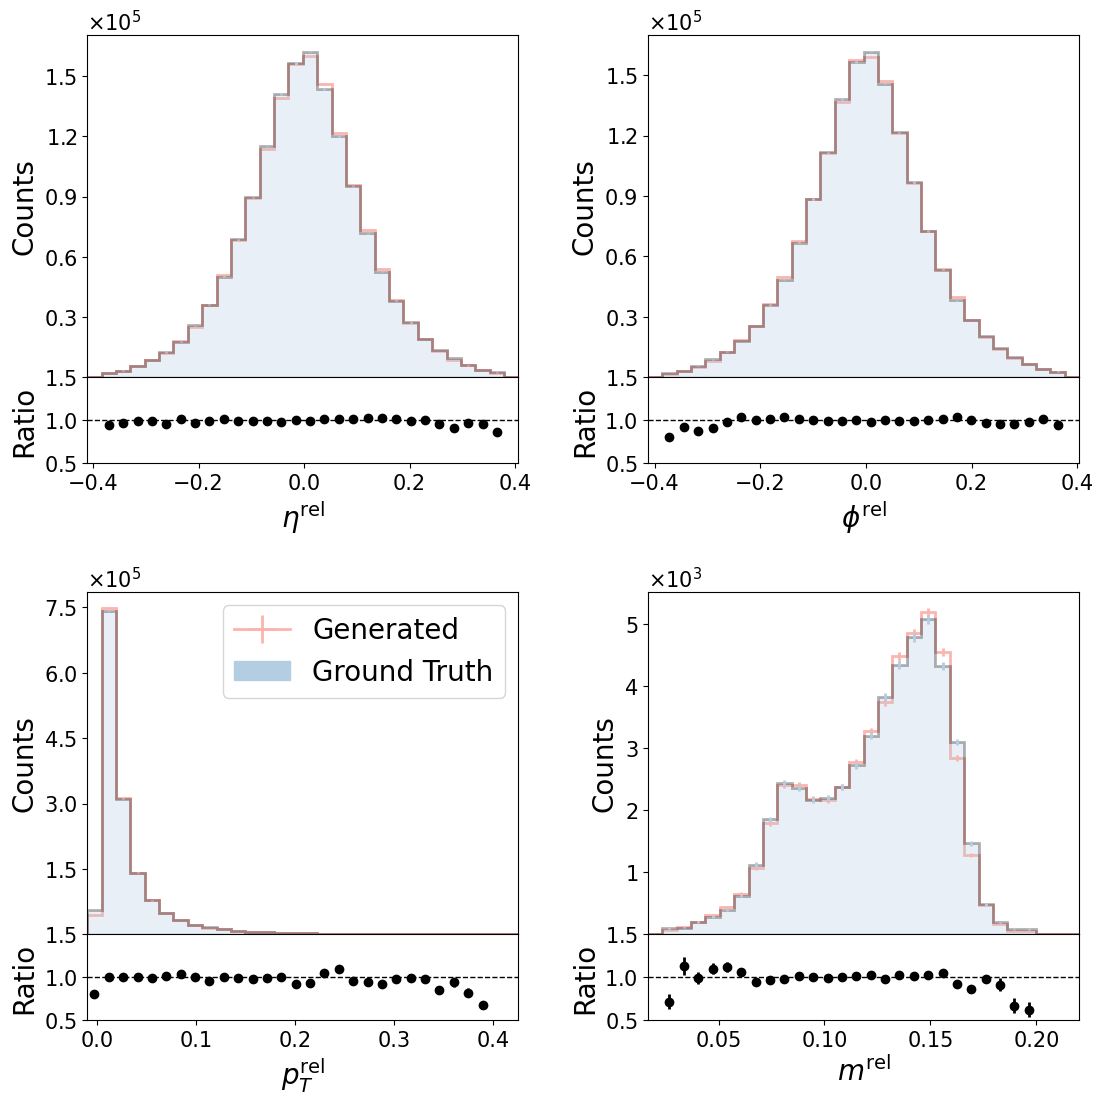

In [6]:
%matplotlib inline
import torch

os.chdir(parent_path)

import sys
# Add this parent directory to the system path
sys.path.insert(0, parent_path)
from fit.fit_pnf import PNF as PNFModel
from fit.fit_nf import NF as NFModel
from fit.fit_tnf import TNF as TNFModel
from fit.fit_tf import TF as TFModel
import pytorch_lightning as pl
import torch
from utils.dataloader_jetnet import PointCloudDataloader
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from utils.helpers import get_hists, mass
from utils.dataloader_jetnet import PointCloudDataloader
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator, FuncFormatter
from jetnet.evaluation import w1m


def create_mask(n, size=30):
    # Ensure n is a 1D tensor
    n = n.flatten()

    # Create a range tensor [0, 1, 2, ..., size-1]
    range_tensor = torch.arange(size).unsqueeze(0)

    # Compare range_tensor with n to create the mask
    mask = range_tensor >= n.unsqueeze(1)

    return mask
def fit_kde(n,m,n_max=30):

    from sklearn.neighbors import KernelDensity
    kde=KernelDensity(bandwidth="scott").fit(n.unsqueeze(1).numpy())
    nhat=kde.sample(100000)
    nhat=nhat[nhat<n_max+1]
    mass_distributions = {int(i):m[n==i] for i in n.unique()}
    mass_kdes = {int(i):KernelDensity(bandwidth=1e-3).fit(mass_distributions[i].unsqueeze(1).numpy()) for i in mass_distributions.keys()}


    return kde,mass_kdes
def sample_kde(n,n_kde,m_kde=False):
    #fit kde
    nhat=n_kde.sample(n)
    np.random.shuffle(nhat)
    if m_kde:
        nhat_hist,bins=np.histogram(nhat+0.01,bins=np.arange(0,31),density=False)
        nhat_hist,bins=torch.tensor(nhat_hist),torch.tensor(bins)
        nhat_hist,bins=nhat_hist[nhat_hist>0],bins[1:][nhat_hist>0]

        n_dict={int(i):j for i,j in zip(bins,nhat_hist)}
        ms=[torch.from_numpy(m_kde[int(i)].sample(n_dict[int(i)])) for i in bins]
        mhat=torch.cat(ms).numpy()
        np.random.shuffle(mhat)

        return torch.from_numpy(nhat),torch.from_numpy(mhat)
    else:
        return nhat

def load_model(ckpt, model_class):
    """
    Load the model from the checkpoint.

    :param ckpt: Checkpoint dictionary.
    :param model_class: The class of the model to be loaded.
    :return: Loaded model.
    """
    flow_state_dict = {k.replace('flow.', ''): v for k, v in ckpt["state_dict"].items() if 'flow' in k}
    config = ckpt["hyper_parameters"]
    config.setdefault("adversarial", False)

    #Adjust the checkpoint path for flow if necessary
    # if "ckpt_flow" in config.keys():
    #     ckpt_flow_parts = config["ckpt_flow"].split("/")
    #     config["ckpt_flow"] = "/".join(ckpt_flow_parts[:-1]) + "/jetnet30/" + ckpt_flow_parts[-1]

    flow = model_class(**config)
    flow.flow.load_state_dict(flow_state_dict)

    # Load additional state dicts based on the model configuration
    if config["context_features"] > 0:
        if config["pf"]:
            context_state_dict = {k.replace('shape.', ''): v for k, v in ckpt["state_dict"].items() if 'shape' in k}
            flow.shape.load_state_dict(context_state_dict)
        elif config["model_name"] == "tnf":
            context_state_dict = {k.replace('gen_net.', ''): v for k, v in ckpt["state_dict"].items() if 'gen_net' in k}
            flow.gen_net.load_state_dict(context_state_dict)

        if config["adversarial"]:
            dis_net_state_dict = {k.replace('dis_net.', ''): v for k, v in ckpt["state_dict"].items() if 'dis_net' in k}
            flow.dis_net.load_state_dict(dis_net_state_dict)

    return flow


def setup_model_with_data(model, data_module, config):
    """
    Sets up the model with the data module and configuration parameters.

    :param model: The model to be set up.
    :param data_module: The data module used for training and validation.
    :param config: Configuration dictionary.
    """
    model.bins = [100, 100, 100, 100]
    model.n_dim = 3
    model.scaler = data_module.scaler
    model.w1m_best = 0.01


    # Calculate the minimum and maximum values from the training data
    mins, maxs, n_counts = calculate_data_bounds(data_module.train_dataloader(), config["n_dim"])
    model.maxs = maxs.cuda()
    model.mins = mins.cuda()
    model.avg_n = torch.cat(n_counts, dim=0).float().cuda().mean()

    # Additional model settings
    model.scaler = model.scaler.to("cuda")
    model.scaler.std = model.scaler.std.cuda()
    model.scaled_mins = torch.tensor(data_module.mins).cuda()
    model.scaled_maxs = torch.tensor(data_module.maxs).cuda()

def calculate_data_bounds(dataloader, n_dim):
    """
    Calculates the minimum and maximum values across the dimensions from the dataloader.

    :param dataloader: The dataloader to process.
    :param n_dim: Number of dimensions.
    :return: Tuple of minimum values, maximum values, and count of non-masked data points.
    """
    mins = torch.ones(n_dim).unsqueeze(0)
    maxs = torch.ones(n_dim).unsqueeze(0)
    n_counts = []

    for data in dataloader:
        non_masked_data = data[0][~data[1]]
        mins = torch.min(torch.cat((mins, non_masked_data.min(0, keepdim=True)[0]), dim=0), dim=0)[0].unsqueeze(0)
        maxs = torch.max(torch.cat((maxs, non_masked_data.max(0, keepdim=True)[0]), dim=0), dim=0)[0].unsqueeze(0)
        n_counts.append((~data[1]).sum(1))


    return mins, maxs, n_counts

def distance_corr(var_1,var_2,power=1):
    """var_1: First variable to decorrelate (eg mass)
    var_2: Second variable to decorrelate (eg classifier output)
    normedweight: Per-example weight. Sum of weights should add up to N (where N is the number of examples)
    power: Exponent used in calculating the distance correlation

    va1_1, var_2 and normedweight should all be 1D torch tensors with the same number of entries

    Usage: Add to your loss function. total_loss = BCE_loss + lambda * distance_corr
    """

    xx = var_1.view(-1, 1).repeat(1, len(var_1)).view(len(var_1),len(var_1))
    yy = var_1.repeat(len(var_1),1).view(len(var_1),len(var_1))
    amat = (xx-yy).abs()

    xx = var_2.view(-1, 1).repeat(1, len(var_2)).view(len(var_2),len(var_2))
    yy = var_2.repeat(len(var_2),1).view(len(var_2),len(var_2))
    bmat = (xx-yy).abs()

    amatavg = torch.mean(amat,dim=1)
    Amat=amat-amatavg.repeat(len(var_1),1).view(len(var_1),len(var_1))\
        -amatavg.view(-1, 1).repeat(1, len(var_1)).view(len(var_1),len(var_1))\
        +torch.mean(amatavg)

    bmatavg = torch.mean(bmat,dim=1)
    Bmat=bmat-bmatavg.repeat(len(var_2),1).view(len(var_2),len(var_2))\
        -bmatavg.view(-1, 1).repeat(1, len(var_2)).view(len(var_2),len(var_2))\
        +torch.mean(bmatavg)

    ABavg = torch.mean(Amat*Bmat,dim=1)
    AAavg = torch.mean(Amat*Amat,dim=1)
    BBavg = torch.mean(Bmat*Bmat,dim=1)

    if(power==1):
        dCorr=(torch.mean(ABavg))/torch.sqrt((torch.mean(AAavg)*torch.mean(BBavg)))
    elif(power==2):
        dCorr=(torch.mean(ABavg))**2/(torch.mean(AAavg)*torch.mean(BBavg))
    else:
        dCorr=((torch.mean(ABavg))/torch.sqrt((torch.mean(AAavg)*torch.mean(BBavg))))**power

    return dCorr


def create_distance_corr_matrix(data):
    num_vars = data.shape[1]
    corr_matrix = np.zeros((num_vars, num_vars))
    for i in range(num_vars):
        for j in range(num_vars):
            corr_matrix[i, j] = distance_corr(data[:, i], data[:, j]).detach().cpu().numpy()

    return corr_matrix


def one_digit_formatter(x, pos):
    return f'{x:.1e}'


FONTSIZE=20
class PlottingThesis:
    def __init__(self, step=None, logger=None, weight=1):
        self.step = step
        self.weight = weight
        self.fig_size1 = [6.4, 6.4]
        self.fig_size2 = [2 * 6.4,2 * 6.4]
        self.fig_size3 = [3 * 6.4, 6.4]
        self.fig_size4 = [4 * 6.4, 6.4]
        self.alpha = 0.3
        #sns.set_theme(style="whitegrid")
        self.cmap = sns.color_palette("Pastel1")
        sns.set_palette("Pastel1")
        self.logger = logger
        mpl.rcParams['lines.linewidth'] = 2
        plt.rcParams['xtick.labelsize'] = 15  # for x-axis tick labels
        plt.rcParams['ytick.labelsize'] = 15  #
        font = { "size": 20}#"family": "normal",
        mpl.rc("font", **font)
        mpl.rc('lines', linewidth=2)

    def plot_ratio(self, h_real, h_fake, weighted, leg=-1, model_name=""):
        fig = plt.figure(figsize=self.fig_size2)


            # Main plot

        # Plot variables and their names
        variables = ["eta", "phi", "pt", "m"]
        names = [r"$\eta^{\mathrm{rel}}$", r"$\phi^{\mathrm{rel}}$", r"$p_T^{\mathrm{rel}}$", r"$m^{\mathrm{rel}}$"]

        outer_gs = gridspec.GridSpec(2, 2, figure=fig,hspace=0.3,wspace=.3)

        for k, (variable, name) in enumerate(zip(variables, names)):
            inner_gs = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_gs[k],
                                                        height_ratios=[4, 1], hspace=0
                                                        )

            # Create the main and ratio axes within the nested grid
            ax_main = fig.add_subplot(inner_gs[0])
            ax_ratio = fig.add_subplot(inner_gs[1], sharex=ax_main)
            ax_main.tick_params(axis='x', which='both', length=0, labelbottom=False)


            # Plotting logic
            h_fake[k].plot_ratio(
                h_real[k],
                ax_dict={"main_ax": ax_main, "ratio_ax": ax_ratio},
                rp_ylabel="Ratio",
                bar_="blue",
                rp_num_label="Generated",
                rp_denom_label="Ground Truth",
                rp_uncert_draw_type="line"
            )
            ax_ratio.set_xlabel(name, fontsize=FONTSIZE)
            ax_main.set_ylabel("Counts", fontsize=FONTSIZE)
            ax_ratio.set_ylabel("Ratio", fontsize=FONTSIZE)
            ax_main.get_legend().remove()
            ax_ratio.set_ylim(0.5, 1.5)
            ax_main.set_xlabel("")

            ax_main.patches[1].set_fill(True)
            ax_main.ticklabel_format(axis="y", style="sci", scilimits=(-3, 3), useMathText=True)
            ax_ratio.ticklabel_format(axis="y", style="sci", scilimits=(-3, 3), useMathText=True)

            locator=MaxNLocator( nbins=6, prune="both")
            ax_main.yaxis.set_major_locator(locator)
            ax_main.patches[1].set_fc(sns.color_palette()[1])
            ax_main.patches[1].set_edgecolor("black")
            ax_main.patches[1].set_linewidth(2)
            ax_main.patches[1].set_alpha(self.alpha)
            ax_main.patches[0].set_lw(2)
            ax_ratio.set_xlim(ax_main.get_xlim())
            if k==2:
                self._adjust_legend(ax_main, leg)


        plt.tight_layout()
        plt.savefig(f"plots/{model_name}_jetnet.pdf", format="pdf")
        plt.show()
        plt.close()

    def plot_corr(self, real, fake, model, leg=-1, disco=False):
        for disco in [False]:
            for name, data in zip(["Ground Truth", "Generated"], [real, fake]):
                if name=="Ground Truth":
                    lims = self._compute_correlation_limits(data, name, disco)

                for feature_idx, feature in enumerate([r"eta", r"phi", r"p_T"]):
                    correlation_matrix = self._compute_correlation_matrix(data[:, :, feature_idx], disco)
                    np.fill_diagonal(correlation_matrix, np.nan)
                    self._plot_heatmap(correlation_matrix, lims[feature_idx], feature, name, model, disco)

    # Additional helper methods for plot_corr and plot_ratio

    def _compute_correlation_matrix(self, tensor, disco=False):
        # Compute the correlation matrix
        if disco:
            return create_distance_corr_matrix(torch.from_numpy(tensor)[:5000])
        else:
            return np.corrcoef(tensor, rowvar=False)

    def _compute_correlation_limits(self, data, name, disco):
        # Compute limits for correlation plots
        lims = []
        for feature_idx in range(3):
            correlation_matrix = self._compute_correlation_matrix(data[:, :, feature_idx], disco)
            non_ones = correlation_matrix[correlation_matrix <= 0.99]
            if name == "Ground Truth":
                lims.append((non_ones.min(), non_ones.max()))
        return lims

    def _plot_heatmap(self, matrix, limits, feature, name, model, disco):
        fig, ax = plt.subplots(1, 1, figsize=(8, 6.4))
        sns.heatmap(matrix,ax=ax, cmap='coolwarm', cbar=False, vmin=limits[0], vmax=limits[1])

        ax.set_xticks([0.5,9.5,19.5,29.5],labels=[1,10,20,30], rotation=0,fontsize=FONTSIZE+5)
        ax.set_yticks([0.5,9.5,19.5,29.5],labels=[1,10,20,30],rotation=0,fontsize=FONTSIZE+5)
        ax.set_xlabel("Particles",fontsize=FONTSIZE+10)
        ax.set_ylabel("Particles",fontsize=FONTSIZE+10)
        #cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
        plt.tight_layout()
        cbar=fig.colorbar(ax.collections[0])
        cbar.ax.tick_params(labelsize=FONTSIZE+5)
        disco_suffix = "_disco" if disco else ""
        if name == "Ground Truth":
            plt.savefig(f"plots/{feature}_corr_{name}{disco_suffix}.pdf", format="pdf")
        else:
            plt.savefig(f"plots/{feature}_corr_{name}{disco_suffix}_{model}.pdf", format="pdf")
        plt.show()

    def _adjust_legend(self, ax, leg):
        # Adjust the legend on the plot
        if leg >= 0:
            ax.legend(loc="best", fontsize=FONTSIZE)
            handles, labels = ax.get_legend_handles_labels()
            handles[1] = mpatches.Patch(color=sns.color_palette()[1], label="The red data")
            ax.legend(handles, labels)
def make_plots(model_name, disco=False):
    import os
    ckptdir = "./ckpts/"

    ckpt = "t_{}.ckpt".format(model_name)
    # ckpt = "t_{}.ckpt".format(model_name)
    ckpt = ckptdir + ckpt
    print(ckpt)

    # Load state dictionary from checkpoint
    state_dict = torch.load(ckpt)
    config = state_dict["hyper_parameters"]
    config["model_name"] = model_name

    print(config)
    # Choose the model class based on the model name
    if model_name in ["ipf", "pf", "apf"]:
        config["pf"] = True
        config["adversarial"] = False
        config["norm"]=False
        config["fast"]=False

        model_class = PNFModel
    else:
        config["pf"] = False
        model_class = NFModel if model_name.find("t")==-1 else TNFModel if model_name.find("tnf")>-1 else TFModel if model_name.find("MDMA")==-1 else MDMA

    torch.set_float32_matmul_precision('medium' )
    model = model_class.load_from_checkpoint(ckpt)
    # flow_state_dict = {k.replace('flow.', ''): v for k, v in state_dict["state_dict"].items() if 'flow' in k}
        # flow.flow.load_state_dict(flow_state_dict)
    model.eval_metrics=False
    print(model_class)
    # Initialize data module and set up model
    data_module = PointCloudDataloader(**config)
    data_module.setup("fit")


    # Assuming `model` is defined elsewhere in your code
    setup_model_with_data(model, data_module, config)
    train=data_module.train_dataloader().dataset.cuda()
    test=data_module.test_dataloader().dataset.cuda()
    data=torch.cat((data_module.scaler.inverse_transform(train[:,:,:-1]),test[:,:,:-1]),dim=0)
    m=mass(data.cuda()).cpu()
    n=(~(torch.cat((train,test),dim=0)[:,:,-1]).bool()).float().sum(1).cpu()
    n_kde,m_kde=fit_kde(n,m)
    n,m=sample_kde(len(data),n_kde,m_kde)
    # Trainer setup and model validation
    trainer = pl.Trainer(devices=1, accelerator="gpu")
    model.eval_metrics=False
    model.batch=[]
    model.masks=[]
    model.fake=[]
    model.conds=[]
    model=model.cuda()
    with torch.no_grad():
        #for batch in data_module.test_dataloader():

            #mask=batch[1].cuda().bool()
            #batch=batch[0].cuda()

            mask=train[:50000,:,-1].bool().cuda()
            batch=data_module.scaler.inverse_transform(train[:50000,:,:-1].cuda())
            m=mass(batch).unsqueeze(1)

            # n,m=sample_kde(len(batch)*10,n_kde,m_kde)
            # m=m[:len(batch)]
            # n=n[:len(batch)]
            # mask=create_mask(n).cuda()
            if config["model"]=="PNF":
                scaled_batch=model.scaler.transform(batch)
                cond=model.shape(scaled_batch.cuda(),mask=mask).repeat_interleave(model.n_part,dim=0)
            elif "context_features" in config.keys() and model.hparams["context_features"]>0:
                cond=m[:len(batch)].cuda().float()
            else:
                cond=None
            fake,_=model.sampleandscale(batch.cuda(),mask=mask, cond=cond,scale=True)
            fake[mask]=0
            w1m_=w1m(batch.cpu(),fake.cpu())
            print("1",w1m)
            # batch=model.scaler.inverse_transform(batch)
            model.batch.append(batch.cpu())
            model.fake.append(fake.cpu())
            model.masks.append(mask.cpu())
            if cond is not None:
                model.conds.append(m.unsqueeze(1).cpu())

    # concatenate all batches
    fake = torch.cat(model.fake)
    true = torch.cat(model.batch)
    sorted_indices = torch.argsort(fake[:,:,2], dim=1, descending=True)
    fake = torch.gather(fake, 1, sorted_indices.unsqueeze(-1).expand(-1, -1, fake.shape[2]))

    m_f, m_t = mass(fake), mass(true)

    # Apply clamping based on quantiles
    mins = torch.quantile(true.reshape(-1, 3), 0.001, dim=0)
    maxs = torch.quantile(true.reshape(-1, 3), 0.999, dim=0)
    fake = torch.clamp(fake, min=mins, max=maxs)
    true = torch.clamp(true, min=mins, max=maxs)
    m_f = torch.clamp(m_f, min=torch.quantile(m_t, 0.001), max=torch.quantile(m_t, 0.999))
    m_t = torch.clamp(m_t, min=torch.quantile(m_t, 0.001), max=torch.quantile(m_t, 0.999))
    mins=torch.cat([mins,torch.tensor([torch.quantile(m_t, 0.001)])])-0.01
    maxs=torch.cat([maxs,torch.tensor([torch.quantile(m_t, 0.999)])])*1.01
    for i in range(5):
        w1m_=w1m(fake,true)
        print(w1m_)
    # Prepare histograms
    hists=get_hists([30,30,30,30],mins*1.1,maxs*1.1,calo=model.name=="calo")

    masks=torch.cat(model.masks)
    # Fill histograms
    for var in range(3):
        hists["hists_real"][var].fill(true.reshape(-1, 3)[(true.reshape(-1, 3) != 0).all(1)][:, var].cpu().numpy())
        hists["hists_fake"][var].fill(fake.reshape(-1, 3)[(fake.reshape(-1, 3) != 0).all(1)][:, var].cpu().numpy())


    hists["hists_real"][3].fill(m_t.cpu().numpy())
    hists["hists_fake"][3].fill(m_f.cpu().numpy())

    # Plotting
    plotter = PlottingThesis()
    plotter.plot_ratio(hists["hists_real"], hists["hists_fake"], weighted=False, leg=2, model_name=model_name)
    # plotter.plot_corr(true.numpy(), fake.numpy(), model_name, disco=disco,leg=-1)
    return model
pointflows=[ "ipf", "apf", "pf",]
flows=["nf","cnf","ccnf"]
gans=["tnf","tnf_fast","tf_slow","tf_slow_ema"]

for model_name in  ["ccnf","tf"]:#
    model=make_plots(model_name)

In [2]:
import torch
import numpy as np
ckpt=torch.load("/beegfs/desy/user/kaechben/thesis/eval_jetnet150/generated_data_50000.pt")
with open("/beegfs/desy/user/kaechben/thesis/eval_jetnet150/EPiC-FM.npy","wb") as f:
    np.save(f,ckpt)


In [1]:
import pandas as pd
import numpy as np
import ast
from numpy import array
import re
# Convert string representation of lists back to lists
def convert_str_to_tuple(s):
    # Extract lists from the string using regex
    s=s.replace("\n ","")
    lists = re.findall(r'\[.*?\]', s)
    arrays = [np.array(ast.literal_eval(l)) for l in lists]
    return tuple(arrays)
results=pd.read_csv("bravobenno.csv")
def weighted_mean(x):
        x,w=np.array(x[0]),np.array(x[1])
        weights=1/w**2
        return np.sum(x*weights)/np.sum(weights)
def weighted_std(x):
    w=(1/np.array(x[1]))**2
    sigma=np.sqrt(1/np.sum(w))
    return sigma

def format_mean_sd(mean, sd):
    """round mean and standard deviation to most significant digit of sd and apply latex formatting"""
    decimals = -int(np.floor(np.log10(sd)))
    decimals -= int((sd * 10 ** decimals) >= 9.5)

    if decimals < 0:
        ten_to = 10 ** (-decimals)
        if mean > ten_to:
            mean = ten_to * (mean // ten_to)
        else:
            mean_ten_to = 10 ** np.floor(np.log10(mean))
            mean = mean_ten_to * (mean // mean_ten_to)
        sd = ten_to * (sd // ten_to)
        decimals = 0

    if mean >= 1e3 and sd >= 1e3:
        mean = np.round(mean * 1e-3)
        sd = np.round(sd * 1e-3)
        return f"${mean:.{decimals}f}$k $\\pm {sd:.{decimals}f}$k"
    else:
        return f"${mean:.{decimals}f} \\pm {sd:.{decimals}f}$"
df=results
df["pmm"]=df["w1m"].apply(ast.literal_eval).apply(lambda x:x).apply(weighted_std)
df["w1m"]=df["w1m"].apply(ast.literal_eval).apply(lambda x:x).apply(weighted_mean)
df["pmp"]=df["w1p"].apply(convert_str_to_tuple).apply(lambda x:x).apply(weighted_std)
df["w1p"]=df["w1p"].apply(convert_str_to_tuple).apply(lambda x:x).apply(weighted_mean)
df["pme"]=df["w1efp"].apply(convert_str_to_tuple).apply(lambda x:x).apply(weighted_std)
df["w1efp"]=df["w1efp"].apply(convert_str_to_tuple).apply(lambda x:x).apply(weighted_mean)

df["fpd_std"]=df["fpd"].apply(ast.literal_eval).apply(lambda x:x[1]).apply(np.mean)
df["fpd"]=df["fpd"].apply(ast.literal_eval).apply(lambda x:x[0]).apply(np.mean)
df["kpd_std"]=df["kpd"].apply(ast.literal_eval).apply(lambda x:x[1]).apply(np.mean)
df["kpd"]=df["kpd"].apply(ast.literal_eval).apply(lambda x:x[0]).apply(np.mean)

cols=["name","w1m","w1efp","w1m","pmm","pme","pmp","cov","mmd","fpd","kpd","time","parameters"]
replace_dict={"MPGAN":"MPGAN","t_cpflow":"PF","t_ipflow":"IPF","t_apflow":"APF","t_nflow":"NF","t_ccnflow":"NF(cc)","t_cnflow":"NF(c)","t_tnflow":"TNF","IN":"IN"}
df.loc[:,"model"]=df["model"].apply(lambda x:replace_dict[x])
df=df.set_index("model",drop=True)
df.loc[:,"w1m"]*=1000
df.loc[:,"w1p"]*=1000
df["w1p"]=df["w1p"]
df.loc[:,"w1efp"]*=100000
df["w1efp"]=df["w1efp"]
df.loc[:,"pmm"]*=1000
df.loc[:,"pmp"]*=1000
df.loc[:,"pme"]*=100000
df.loc[:,"fpd"]*=10000
df.loc[:,"fpd_std"]*=10000
df.loc[:,"kpd"]*=10000

df.loc[:,"kpd_std"]*=10000
df.loc[:,"w1m"]=df.apply(lambda x:format_mean_sd(float(x["w1m"]),float(x["pmm"])),axis=1)
df.loc[:,"w1p"]=df.apply(lambda x:format_mean_sd(float(x["w1p"]),float(x["pmp"])),axis=1)
df.loc[:,"w1efp"]=df.apply(lambda x:format_mean_sd(float(x["w1efp"]),float(x["pme"])),axis=1)
df.loc[:,"kpd"]=df.apply(lambda x:format_mean_sd(float(x["kpd"]),float(x["kpd_std"])),axis=1)
df.loc[:,"fpd"]=df.apply(lambda x:format_mean_sd(float(x["fpd"]),float(x["fpd_std"])),axis=1)
df.loc[:,"time"]*=1e6
df.loc[:,"time"]=np.round(df["time"],decimals=1)
order=["PF","IPF","APF","NF","NF(c)","NF(cc)","TNF","MPGAN","IN"]
df=df.loc[order,:]
print(df)
# def count_parameters(model): return sum(p.numel() for p in model.parameters() if p.requires_grad)
# print (count_parameters(model.gen_net))
tex=""
for p in ["t"]:
    temp=df
    for col in df.columns:
        if col not in ["w1m","w1p","w1efp","fpd","kpd","time"]:
            continue
        temp_index=temp[col].astype(str).str.replace("$","").str.replace("k","").str.split("\\").str[0].astype(float)
        mins=temp_index==temp_index.drop("IN").min()
        temp.loc[mins,col]="$\mathbf{"+temp.loc[mins,col].astype(str).str.replace("$","")+"}$"
    temp=temp.reset_index()[["model","w1m","w1p","w1efp","kpd","fpd","time"]]
    temp.columns=["model","$W_1^M (\times 10^{3})$","$W_1^P (\times 10^{3})$","$W_1^{EFP}(\times 10^{5})$","$KPD(\times 10^{4})$","$FPD$","Time $\mu s$"]
    text=temp.to_latex(index=False,escape=False)
    parton="Gluon" if p=="g" else "Light Quark" if p=="q" else "Top Quark"
    tex+="\multirow{9}{*}{"+parton+"} & "+text.split("FPD")[1].split("\\bottomrule")[0].replace("\\\\","\\\\&").replace("\\midrule","").replace("  ","")[:-2]+"\cline{1-8}"
    tex+="\n"
print(tex)


FileNotFoundError: [Errno 2] No such file or directory: 'bravobenno.csv'

In [17]:
results["w1efp"][0]

'(array([0.00025178, 0.00022063, 0.00026026, 0.00043311, 0.00019063]), array([6.04386555e-07, 1.94986961e-06, 2.46654965e-06, 1.54915805e-06,\n       1.93143100e-06]))'